In [6]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# 1. 데이터 크기 확인
df.shape

# 2. 기본 정보 확인
df.info()

# 3. 숫자형 변수 요약
df.describe()

# 4. 타겟 변수 분포 확인
df['Attrition'].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [10]:
# 직무별 평균
print("=== JobRole Stats ===")
print(df.groupby("JobRole")[["JobSatisfaction","PerformanceRating","WorkLifeBalance"]].mean())

print("\n=== Gender Stats ===")
print(df.groupby("Gender")[["Age","JobLevel","TotalWorkingYears"]].mean())

=== JobRole Stats ===
                           JobSatisfaction  PerformanceRating  WorkLifeBalance
JobRole                                                                       
Healthcare Representative         2.786260           3.152672         2.702290
Human Resources                   2.557692           3.134615         2.923077
Laboratory Technician             2.691120           3.162162         2.718147
Manager                           2.705882           3.196078         2.774510
Manufacturing Director            2.682759           3.186207         2.765517
Research Director                 2.700000           3.100000         2.862500
Research Scientist                2.773973           3.167808         2.678082
Sales Executive                   2.754601           3.125767         2.803681
Sales Representative              2.734940           3.144578         2.891566

=== Gender Stats ===
              Age  JobLevel  TotalWorkingYears
Gender                                  

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64


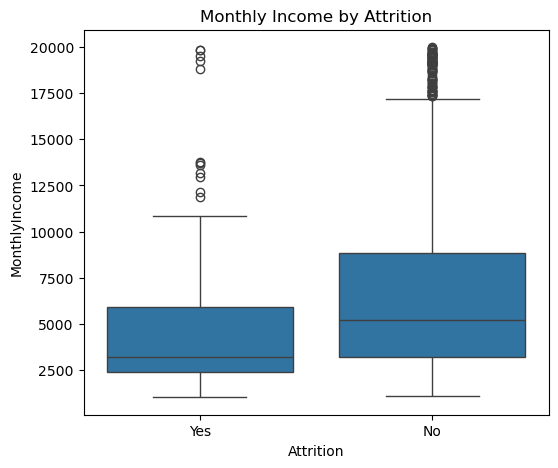

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 이직 여부에 따른 평균 월급
attrition_income = df.groupby("Attrition")["MonthlyIncome"].mean()
print(attrition_income)

# 시각화: 박스플롯으로 분포 비교
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome")
plt.title("Monthly Income by Attrition")
plt.show()


In [13]:
# 수치형 변수만 선택
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

# 이직 여부별 평균 비교
attrition_means = df.groupby("Attrition")[numeric_cols].mean().T
attrition_means["diff"] = attrition_means["No"] - attrition_means["Yes"]
attrition_means.sort_values("diff", ascending=False).head(10)


Attrition,No,Yes,diff
MonthlyIncome,6832.739659,4787.092827,2045.646832
DailyRate,812.504461,750.362869,62.141591
EmployeeNumber,1027.656123,1010.345992,17.310132
Age,37.561233,33.607595,3.953638
TotalWorkingYears,11.862936,8.244726,3.618210
YearsAtCompany,7.369019,5.130802,2.238217
YearsInCurrentRole,4.484185,2.902954,1.581231
YearsWithCurrManager,4.367397,2.852321,1.515076
JobLevel,2.145985,1.637131,0.508855
HourlyRate,65.952149,65.573840,0.378310


In [17]:
from IPython.display import display

# 범주형 변수만 추출 (Attrition 제외)
cat_cols = df.select_dtypes(include=['object']).columns.drop("Attrition")

# 각 변수별로 Attrition 분포 계산 후 출력
for col in cat_cols:
    ctab = pd.crosstab(df[col], df["Attrition"], normalize="index") * 100
    print(f"\n===== {col} vs Attrition =====")
    display(ctab.round(1))



===== BusinessTravel vs Attrition =====


Attrition,No,Yes
BusinessTravel,,
Non-Travel,92.0,8.0
Travel_Frequently,75.1,24.9
Travel_Rarely,85.0,15.0



===== Department vs Attrition =====


Attrition,No,Yes
Department,,
Human Resources,81.0,19.0
Research & Development,86.2,13.8
Sales,79.4,20.6



===== EducationField vs Attrition =====


Attrition,No,Yes
EducationField,,
Human Resources,74.1,25.9
Life Sciences,85.3,14.7
Marketing,78.0,22.0
Medical,86.4,13.6
Other,86.6,13.4
Technical Degree,75.8,24.2



===== Gender vs Attrition =====


Attrition,No,Yes
Gender,,
Female,85.2,14.8
Male,83.0,17.0



===== JobRole vs Attrition =====


Attrition,No,Yes
JobRole,,
Healthcare Representative,93.1,6.9
Human Resources,76.9,23.1
Laboratory Technician,76.1,23.9
Manager,95.1,4.9
Manufacturing Director,93.1,6.9
Research Director,97.5,2.5
Research Scientist,83.9,16.1
Sales Executive,82.5,17.5
Sales Representative,60.2,39.8



===== MaritalStatus vs Attrition =====


Attrition,No,Yes
MaritalStatus,,
Divorced,89.9,10.1
Married,87.5,12.5
Single,74.5,25.5



===== Over18 vs Attrition =====


Attrition,No,Yes
Over18,,
Y,83.9,16.1



===== OverTime vs Attrition =====


Attrition,No,Yes
OverTime,,
No,89.6,10.4
Yes,69.5,30.5


=== Numeric Variables Attrition Difference Ranking ===


Attrition,No,Yes,diff,abs_diff
MonthlyIncome,6832.739659,4787.092827,2045.646832,2045.646832
MonthlyRate,14265.779400,14559.308017,-293.528617,293.528617
DailyRate,812.504461,750.362869,62.141591,62.141591
Age,37.561233,33.607595,3.953638,3.953638
TotalWorkingYears,11.862936,8.244726,3.618210,3.618210
YearsAtCompany,7.369019,5.130802,2.238217,2.238217
DistanceFromHome,8.915653,10.632911,-1.717259,1.717259
YearsInCurrentRole,4.484185,2.902954,1.581231,1.581231
YearsWithCurrManager,4.367397,2.852321,1.515076,1.515076
JobLevel,2.145985,1.637131,0.508855,0.508855



=== Categorical Variables Attrition Difference Ranking ===


,feature,range_pp,max_cat,max_yes%,min_cat,min_yes%,n_levels
0,JobRole,37.259036,Sales Representative,39.8,Research Director,2.5,9
1,OverTime,20.092414,Yes,30.5,No,10.4,2
2,BusinessTravel,16.909747,Travel_Frequently,24.9,Non-Travel,8.0,3
3,MaritalStatus,15.440172,Single,25.5,Divorced,10.1,3
4,EducationField,12.511292,Human Resources,25.9,Other,13.4,6
5,Department,6.788052,Sales,20.6,Research & Development,13.8,3
6,Gender,2.210884,Male,17.0,Female,14.8,2
7,Over18,0.000000,Y,16.1,Y,16.1,1


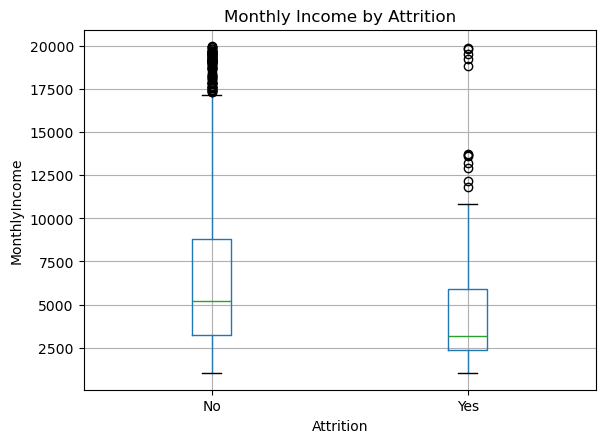

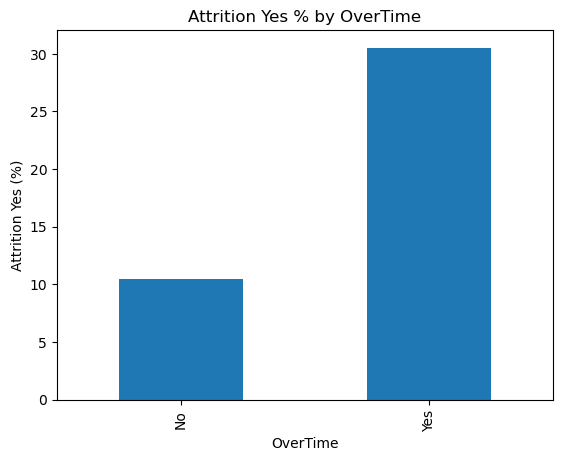

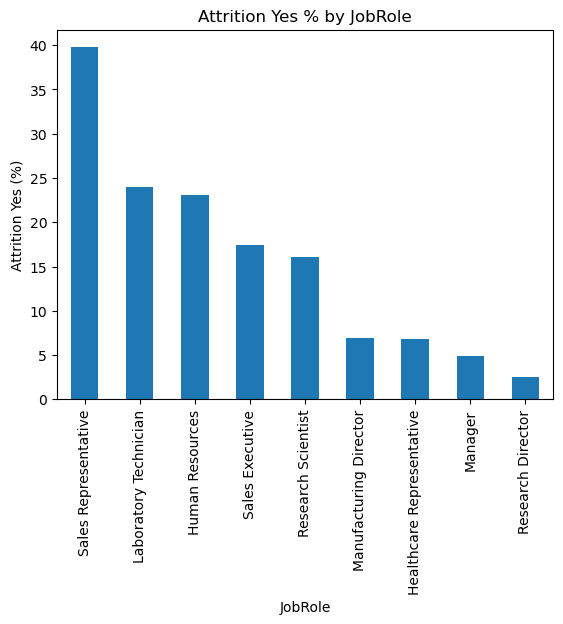

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 1. 수치형 변수 차이 분석
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols = num_cols.drop(['EmployeeNumber'], errors='ignore')  # 고유번호 제외

num_summary = df.groupby('Attrition')[num_cols].mean().T
num_summary['diff'] = num_summary.get('No', 0) - num_summary.get('Yes', 0)
num_summary['abs_diff'] = num_summary['diff'].abs()

num_rank = num_summary.sort_values('abs_diff', ascending=False)
print("=== Numeric Variables Attrition Difference Ranking ===")
display(num_rank.head(15))

# 2. 범주형 변수 차이 분석
cat_cols = df.select_dtypes(include=['object']).columns.drop('Attrition')

cat_tables = {}
cat_summary = []

for col in cat_cols:
    tab = pd.crosstab(df[col], df['Attrition'], normalize='index') * 100
    tab = tab.rename(columns={'No':'AttritionNo_%', 'Yes':'AttritionYes_%'})
    cat_tables[col] = tab

    yes = tab['AttritionYes_%']
    rng = yes.max() - yes.min()
    cat_summary.append({
        'feature': col,
        'range_pp': rng,
        'max_cat': yes.idxmax(),
        'max_yes%': round(yes.max(), 1),
        'min_cat': yes.idxmin(),
        'min_yes%': round(yes.min(), 1),
        'n_levels': len(yes)
    })

cat_rank = pd.DataFrame(cat_summary).sort_values('range_pp', ascending=False).reset_index(drop=True)
print("\n=== Categorical Variables Attrition Difference Ranking ===")
display(cat_rank)

# 3. 예시 시각화 (보고서용)
# 월급 박스플롯
df.boxplot(column='MonthlyIncome', by='Attrition')
plt.title('Monthly Income by Attrition'); plt.suptitle(''); plt.xlabel('Attrition'); plt.ylabel('MonthlyIncome')
plt.show()

# OverTime 이직률 막대그래프
cat_tables['OverTime']['AttritionYes_%'].plot(kind='bar')
plt.title('Attrition Yes % by OverTime'); plt.xlabel('OverTime'); plt.ylabel('Attrition Yes (%)')
plt.show()

# JobRole 이직률 막대그래프
cat_tables['JobRole']['AttritionYes_%'].sort_values(ascending=False).plot(kind='bar')
plt.title('Attrition Yes % by JobRole'); plt.xlabel('JobRole'); plt.ylabel('Attrition Yes (%)')
plt.show()


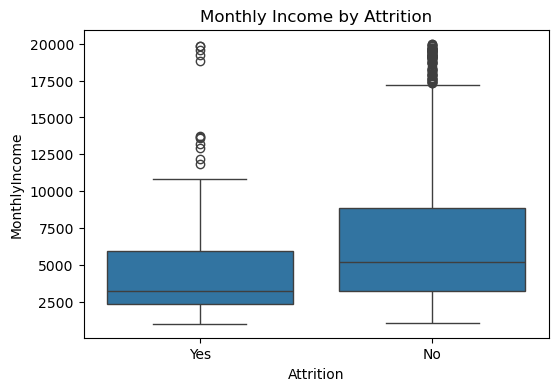

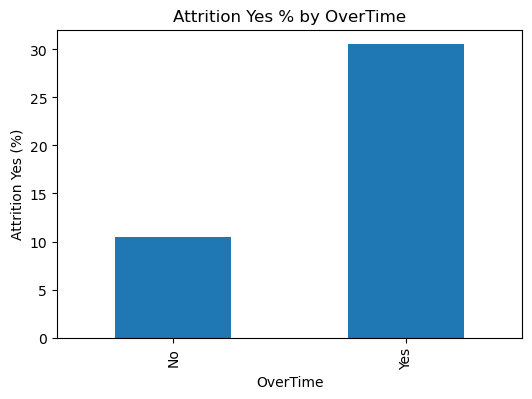

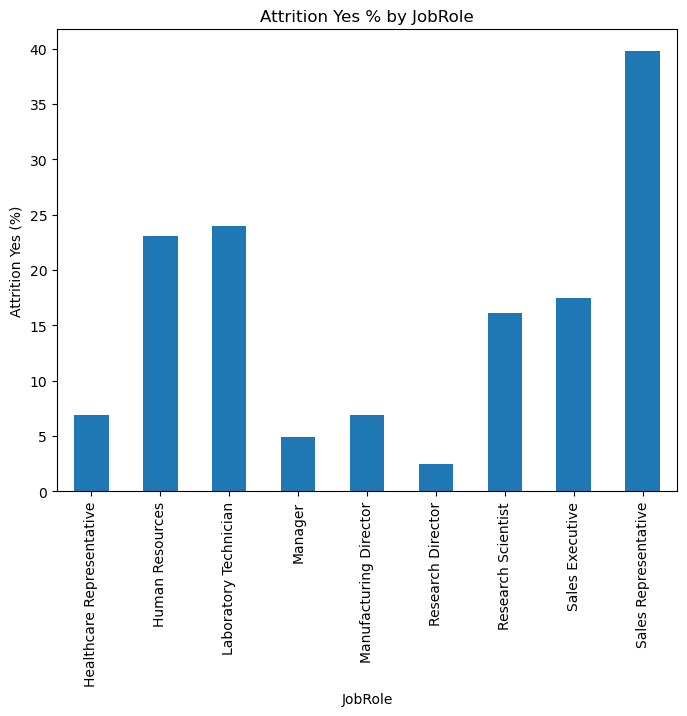

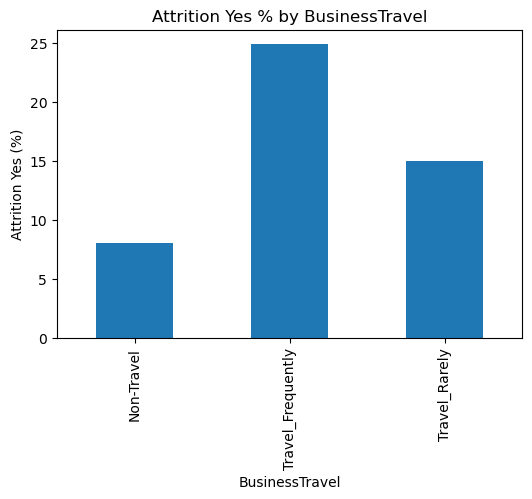

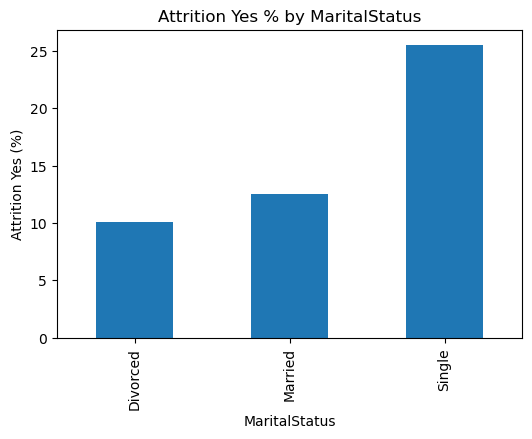

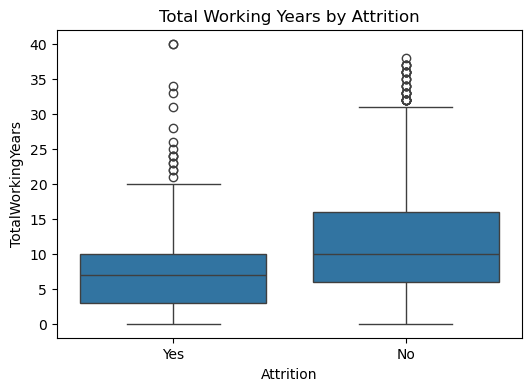

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 급여 차이 (수치형) - 박스플롯
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income by Attrition")
plt.show()

# 2. 야근 여부 (범주형) - 막대그래프
plt.figure(figsize=(6,4))
overtime_plot = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100
overtime_plot.plot(kind='bar')
plt.ylabel("Attrition Yes (%)")
plt.title("Attrition Yes % by OverTime")
plt.show()

# 3. 직무별 특성 (범주형) - 막대그래프
plt.figure(figsize=(8,6))
jobrole_plot = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100
jobrole_plot.plot(kind='bar')
plt.ylabel("Attrition Yes (%)")
plt.title("Attrition Yes % by JobRole")
plt.show()

# 4. 출장 빈도 (범주형) - 막대그래프
plt.figure(figsize=(6,4))
travel_plot = df.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100
travel_plot.plot(kind='bar')
plt.ylabel("Attrition Yes (%)")
plt.title("Attrition Yes % by BusinessTravel")
plt.show()

# 5. 결혼 여부 (범주형) - 막대그래프
plt.figure(figsize=(6,4))
marital_plot = df.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100
marital_plot.plot(kind='bar')
plt.ylabel("Attrition Yes (%)")
plt.title("Attrition Yes % by MaritalStatus")
plt.show()

# 6. 경력 차이 (수치형) - 박스플롯
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title("Total Working Years by Attrition")
plt.show()
